In [4]:
import sys
from pathlib import Path
import importlib

# Adicionar o diretório raiz ao sys.path
sys.path.append(str(Path.cwd().parent / "scripts"))

import investment_and_crypto # type: ignore
importlib.reload(investment_and_crypto)

from assets import ativos # type: ignore
from investment_and_crypto import ( # type: ignore
    baixar_dados,
    carteira_pesos_iguais,
    carteira_otimizada_sharpe,
    gerar_matriz_correlacao,
    grafico_crypto,
)

In [5]:
# Configurações do Usuário
escolhas_usuario = ["Bitcoin", "Ethereum", "XRP", "Tether", "Solana", "Dogecoin", "Stellar"]
periodo_usuario = "36M"

[*********************100%***********************]  7 of 7 completed
[*********************100%***********************]  2 of 2 completed


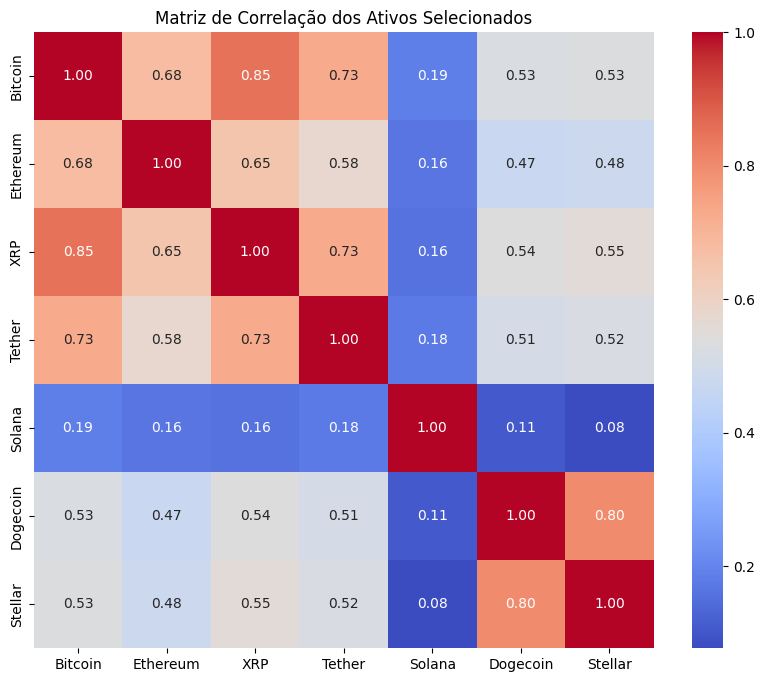

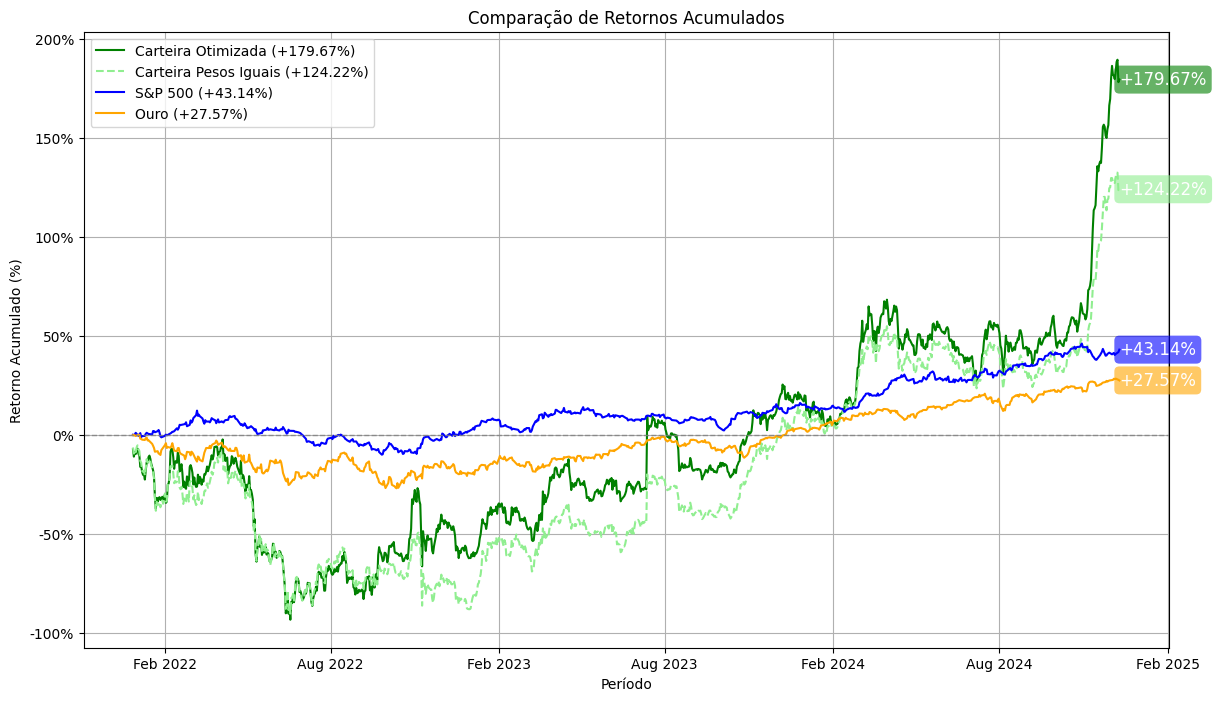


Pesos Iguais da Carteira:
Bitcoin: 14.29%
Ethereum: 14.29%
XRP: 14.29%
Tether: 14.29%
Solana: 14.29%
Dogecoin: 14.29%
Stellar: 14.29%

Pesos Otimizados da Carteira (Sharpe):
Bitcoin: 21.04%
Ethereum: 33.26%
XRP: 0.00%
Tether: 0.00%
Solana: 0.00%
Dogecoin: 0.00%
Stellar: 45.70%


In [6]:
# Baixar Dados dos Ativos Escolhidos
dados_escolhidos = baixar_dados([ativos[ativo] for ativo in escolhas_usuario], periodo_usuario)

# Renomear colunas do DataFrame com os nomes amigáveis
dados_escolhidos.columns = escolhas_usuario

# Calcular Retornos Diários e Carteiras
retornos = dados_escolhidos.pct_change().dropna()
pesos_iguais, retorno_iguais = carteira_pesos_iguais(retornos)
pesos_otimizados, retorno_otimizado = carteira_otimizada_sharpe(retornos)

# Comparação com Benchmarks (S&P 500 e Ouro)
dados_benchmarks = baixar_dados([ativos["S&P 500"], ativos["OURO"]], periodo_usuario)

# Renomear colunas explicitamente
dados_benchmarks.columns = ["S&P 500", "OURO"]
retorno_sp500 = dados_benchmarks["S&P 500"].pct_change().dropna().cumsum()
retorno_ouro = dados_benchmarks["OURO"].pct_change().dropna().cumsum()

# Gerar Matriz de Correlação e Gráfico
gerar_matriz_correlacao(retornos)  # As colunas agora são os nomes amigáveis
grafico_crypto(retorno_iguais, retorno_otimizado, retorno_sp500, retorno_ouro, periodo_usuario)

# Exibir Pesos das Carteiras
print("\nPesos Iguais da Carteira:")
for ativo, peso in zip(escolhas_usuario, pesos_iguais):
    print(f"{ativo}: {peso:.2%}")

print("\nPesos Otimizados da Carteira (Sharpe):")
for ativo, peso in zip(escolhas_usuario, pesos_otimizados):
    print(f"{ativo}: {peso:.2%}")